# Exploratory analysis of Perceptions about Science and Open Science

This analysis revolves around the undergraduate thesis carried out by Franco Sebastián Benítez, under the supervision of Débora Burin and Lucas Cuenya, from the School of Psychology of the University of Buenos Aires.

As set in our preregistration, we are checking the following aspects:

1) Check for exclusion criteria in the demographic data, and in the completion rate.

2) Describe the sample’s demographic characteristics. 

3) Analyse the total percentage of “yes” responses to belief in crisis. Analyse as a function of career stage and methodological approach.

4) Qualitative analysis of open field response to belief in crisis.

5) Percentage of  agreement with each, and combined, statements about replication crisis, p-value, publication bias. Analyse as a function of career stage and methodological approach.

6) Percentage of  agreement with each, and combined, statements about perceived barriers. Analyse as a function of career stage and methodological approach.

7) Percentage of  agreement with each, and combined, statements about attitudes against adopting open science practices. Analyse as a function of career stage and methodological approach.

8) Qualitative analysis of open field response to attitudes about barriers against adopting open science practices.

## Loading the necessary libraries

In [1]:
import pandas as pd                  # data wrangling
import matplotlib.pyplot as plt      # plotting

## Loading the dataset

In [2]:
df = pd.read_csv("../data/Percepciones sobre ciencia y ciencia abierta.csv")

In [3]:
df

,Timestamp,¿Acepta participar?,Edad (años),Nivel educativo alcanzado,Área/s de investigación,"¿Ha participado en un proyecto de investigación (v. g., UBACyT, CONICET) en los últimos 5 años?","¿Ha publicado en una revista indexada con referato (v. g., Scopus, Scimago, Scielo) en los últimos 5 años?",Marque su posición actual en la Facultad de Psicología de la UBA,¿Qué tipo de metodología suele predominar en sus estudios?,¿Cree que hay una crisis en la ciencia?,...,"[Poner los materiales (e.g., cuestionarios, procedimientos) a disposición mediante plataformas o repositorios públicos].1",[Reportar toda la información necesaria detalladamente para que otras personas puedan replicar mi estudio].1,[Compartir una pre-impresión (pre-print) publicándola en un repositorio de confianza],[Usar revisión por partes abierta],[Publicar en revistas de acceso abierto].1,[Adaptar un test psicométrico].1,[Participar en proyectos abiertos y colaborativos a gran escala].1,¿Cuáles le parecen que son las mayores barreras para la aceptación y puesta en práctica de prácticas de ciencia abierta en su campo y/o lugar de trabajo?,"Si aplica, por favor describa brevemente qué barreras ha experimentado para incorporar o mantener prácticas de ciencia abierta","Por último, si posee alguna idea o comentario respecto a esta encuesta o al tema que aborda, por favor escribalo brevemente a continuación"
0,2021/04/16 11:57:53 AM GMT-3,Sí,37,Licenciado,Psicoanálisis Filosofía,Sí,Sí,ATP,Cualitativa,No,...,No sé,No sé,No sé,Poco importante,Medianamente importante,No sé,No sé,9. No percibo ninguna barrera,NaN,NaN
1,2021/04/16 12:13:54 PM GMT-3,Sí,48,Doctorado,Alcohol,Sí,Sí,Adjunto;Titular,MIxta,No,...,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,1. Falta de incentivos;2. Falta de requerimien...,NaN,NaN
2,2021/04/16 2:43:17 PM GMT-3,Sí,37,Doctorado,Neurociencia cognitiva,Sí,Sí,Titular,MIxta,No,...,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,1. Falta de incentivos;6. Falta de financiamie...,Economia! Muchas veces hay qeu pagar para que ...,NaN
3,2021/04/16 3:33:59 PM GMT-3,Sí,31,Doctorado,Psicoterapia,Sí,Sí,Titular;Ademas cargo Investigacion/docente,Cuantitativa,Sí,...,Muy importante,Muy importante,Poco importante,Muy importante,Medianamente importante,Muy importante,Medianamente importante,1. Falta de incentivos;3. Falta de información...,NaN,NaN
4,2021/04/16 3:35:35 PM GMT-3,Sí,38,Doctorado,Psicología del desarrollo,Sí,Sí,ATP,Cuantitativa,No,...,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,2. Falta de requerimiento por parte de financi...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2021/07/14 9:36:08 AM GMT-3,Sí,35,Licenciado;Especialización;Maestría,Salud mental,Sí,No,Asistente inv,Cualitativa,No,...,Medianamente importante,Medianamente importante,Medianamente importante,Medianamente importante,Muy importante,Poco importante,Muy importante,1. Falta de incentivos;4. Falta de infraestruc...,NaN,Interesante. Fue muy difícil completarlo desde...
86,2021/07/14 11:10:45 AM GMT-3,Sí,56,Doctorado,"genero, subjetividad, salud colectiva",Sí,Sí,Adjunto,Cualitativa,Sí,...,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,1. Falta de incentivos;2. Falta de requerimien...,"falta de requirimiento, tiempo y apoyo",muy interesante
87,2021/07/14 2:18:46 PM GMT-3,Sí,27,Licenciado;Especialización;Maestría,Neuropsicología / Neurociencias,Sí,Sí,ATP,Cuantitativa,Sí,...,Muy importante,Muy importante,Muy importante,Medianamente importante,Muy importante,Muy importante,Muy importante,1. Falta de incentivos;2. Falta de requerimien...,NaN,NaN
88,2021/07/14 7:10:00 PM GMT-3,Sí,45,Doctorado,Investigación empirica en psicoterapia,Sí,Sí,JTP,MIxta,No,...,Muy importante,Medianamente importante,Medianamente important

In [4]:
df.shape

(90, 53)

The data contains 53 columnas and 40 rows.

Now let's rename the columns to make it easier to manipulate.

In [5]:
column_names = {"Timestamp": "timestamp",
                "Edad (años)": "age",
                "Nivel educativo alcanzado": "education",
                "Área/s de investigación": "area",
                "¿Ha participado en un proyecto de investigación (v. g., UBACyT, CONICET) en los últimos 5 años?": "project",
                "¿Ha publicado en una revista indexada con referato (v. g., Scopus, Scimago, Scielo) en los últimos 5 años?": "journal",
                "Marque su posición actual en la Facultad de Psicología de la UBA": "position",
                "¿Qué tipo de metodología suele predominar en sus estudios?": "methodology",
                "¿Cree que hay una crisis en la ciencia?": "belief",
                "[Poner los materiales (e.g., cuestionarios, procedimientos) a disposición mediante plataformas o repositorios públicos].1": "materials",
                "[Reportar toda la información necesaria detalladamente para que otras personas puedan replicar mi estudio].1": "report",
                "[Compartir una pre-impresión (pre-print) publicándola en un repositorio de confianza]": "share",
                "[Usar revisión por partes abierta]": "open_review",
                "[Publicar en revistas de acceso abierto].1": "open_journal",
                "[Adaptar un test psicométrico].1": "psychometric_test",
                "[Participar en proyectos abiertos y colaborativos a gran escala].1": "open_project",
                "¿Cuáles le parecen que son las mayores barreras para la aceptación y puesta en práctica de prácticas de ciencia abierta en su campo y/o lugar de trabajo?": "barriers_1",
                "Si aplica, por favor describa brevemente qué barreras ha experimentado para incorporar o mantener prácticas de ciencia abierta": "barriers_2",
                "Por último, si posee alguna idea o comentario respecto a esta encuesta o al tema que aborda, por favor escribalo brevemente a continuación": "comments"
               }

df.rename(columns = column_names, inplace=True)
df.timestamp = pd.to_datetime(df.timestamp)

## Analysis 

### 1) Check for exclusion criteria in the demographic data, and in the completion rate.

In [6]:
df["project"].value_counts()

Sí    83
No     7
Name: project, dtype: int64

In [7]:
df["journal"].value_counts()

Sí    68
No    22
Name: journal, dtype: int64

In [8]:
exclusion_criteria = df[["project", "journal"]]

i = -1 # to take in account the index 0
for a, b in exclusion_criteria.itertuples(index=False):
    i = i + 1
    if a == "No" and b == "No":
        print(f"Participant n° {i} will be excluded")

Participant n° 20 will be excluded
Participant n° 26 will be excluded
Participant n° 64 will be excluded
Participant n° 78 will be excluded
Participant n° 80 will be excluded


In [9]:
df[["project", 
    "journal"]].iloc[26]

project    No
journal    No
Name: 26, dtype: object

In [10]:
df[["project", 
    "journal"]].iloc[20]

project    No
journal    No
Name: 20, dtype: object

In [11]:
df.drop([20, 26], axis=0)

,timestamp,¿Acepta participar?,age,education,area,project,journal,position,methodology,belief,...,"[Poner los materiales (e.g., cuestionarios, procedimientos) a disposición mediante plataformas o repositorios públicos].1",[Reportar toda la información necesaria detalladamente para que otras personas puedan replicar mi estudio].1,[Compartir una pre-impresión (pre-print) publicándola en un repositorio de confianza],[Usar revisión por partes abierta],[Publicar en revistas de acceso abierto].1,[Adaptar un test psicométrico].1,[Participar en proyectos abiertos y colaborativos a gran escala].1,barriers_1,barriers_2,"Por último, si posee alguna idea o comentario respecto a esta encuesta o al tema que aborda, por favor escribalo brevemente a continuación"
0,2021-04-16 11:57:53+03:00,Sí,37,Licenciado,Psicoanálisis Filosofía,Sí,Sí,ATP,Cualitativa,No,...,No sé,No sé,No sé,Poco importante,Medianamente importante,No sé,No sé,9. No percibo ninguna barrera,NaN,NaN
1,2021-04-16 12:13:54+03:00,Sí,48,Doctorado,Alcohol,Sí,Sí,Adjunto;Titular,MIxta,No,...,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,1. Falta de incentivos;2. Falta de requerimien...,NaN,NaN
2,2021-04-16 14:43:17+03:00,Sí,37,Doctorado,Neurociencia cognitiva,Sí,Sí,Titular,MIxta,No,...,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,1. Falta de incentivos;6. Falta de financiamie...,Economia! Muchas veces hay qeu pagar para que ...,NaN
3,2021-04-16 15:33:59+03:00,Sí,31,Doctorado,Psicoterapia,Sí,Sí,Titular;Ademas cargo Investigacion/docente,Cuantitativa,Sí,...,Muy importante,Muy importante,Poco importante,Muy importante,Medianamente importante,Muy importante,Medianamente importante,1. Falta de incentivos;3. Falta de información...,NaN,NaN
4,2021-04-16 15:35:35+03:00,Sí,38,Doctorado,Psicología del desarrollo,Sí,Sí,ATP,Cuantitativa,No,...,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,2. Falta de requerimiento por parte de financi...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2021-07-14 09:36:08+03:00,Sí,35,Licenciado;Especialización;Maestría,Salud mental,Sí,No,Asistente inv,Cualitativa,No,...,Medianamente importante,Medianamente importante,Medianamente importante,Medianamente importante,Muy importante,Poco importante,Muy importante,1. Falta de incentivos;4. Falta de infraestruc...,NaN,Interesante. Fue muy difícil completarlo desde...
86,2021-07-14 11:10:45+03:00,Sí,56,Doctorado,"genero, subjetividad, salud colectiva",Sí,Sí,Adjunto,Cualitativa,Sí,...,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,Muy importante,1. Falta de incentivos;2. Falta de requerimien...,"falta de requirimiento, tiempo y apoyo",muy interesante
87,2021-07-14 14:18:46+03:00,Sí,27,Licenciado;Especialización;Maestría,Neuropsicología / Neurociencias,Sí,Sí,ATP,Cuantitativa,Sí,...,Muy importante,Muy importante,Muy importante,Medianamente importante,Muy importante,Muy importante,Muy importante,1. Falta de incentivos;2. Falta de requerimien...,NaN,NaN
88,2021-07-14 19:10:00+03:00,Sí,45,Doctorado,Investigación empirica en psicoterapia,Sí,Sí,JTP,MIxta,No,...,Muy importante,Medianamente importante,Medianamente importante,Poco importante,Muy importante,Poco importante,Muy importante,3. Falta de información y entrenamiento;5. Fal...,NaN,NaN


Now we have two less rows.

### 2) Describe the sample’s demographic characteristics.

#### 2.1) Education

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

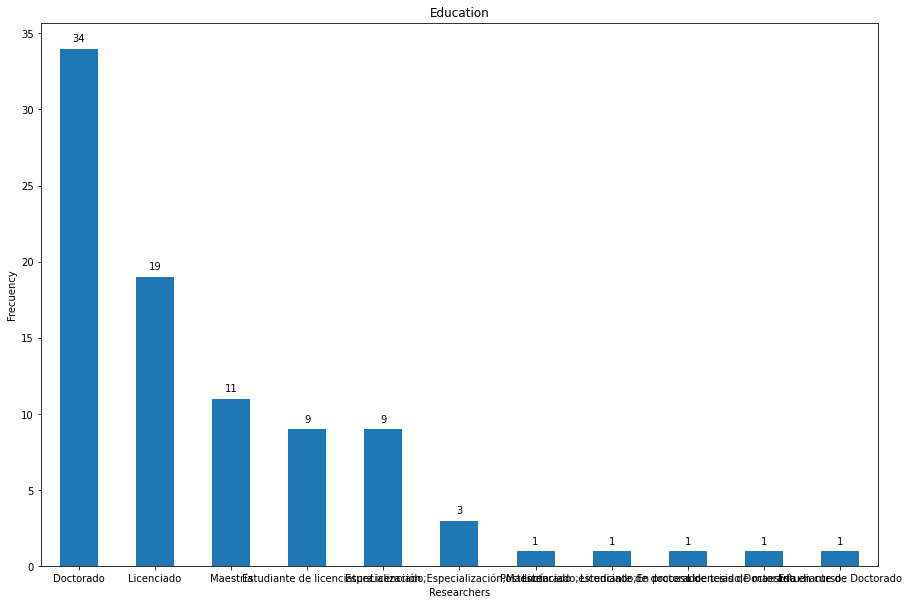

In [12]:
plt.figure(figsize=(15,10))
ax = df.groupby('education').size().sort_values(ascending=False).plot.bar()
ax.set_title('Education')
ax.set_xlabel("Researchers")
ax.set_ylabel("Frecuency")

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = y_value
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      

add_value_labels(ax)
plt.xticks(rotation=0)

#### 2.2) Research area

In [13]:
df["area"].value_counts()

Psicología                                                                                      4
Neuropsicología                                                                                 3
Psicología Social                                                                               2
Psicología Experimental                                                                         2
Psicología del desarrollo                                                                       2
                                                                                               ..
Metodología de la investigación, Psicología y Epistemología Genética                            1
Psicoterapia                                                                                    1
Historia de las Ciencias                                                                        1
Psicología de la Salud - Modelo Cognitivo Conductual - Enfermedades crónicas y Dolor Crónico    1
Psicología / neuroci

#### 2. 3) Position 

Text(0, 0.5, 'Frecuency')

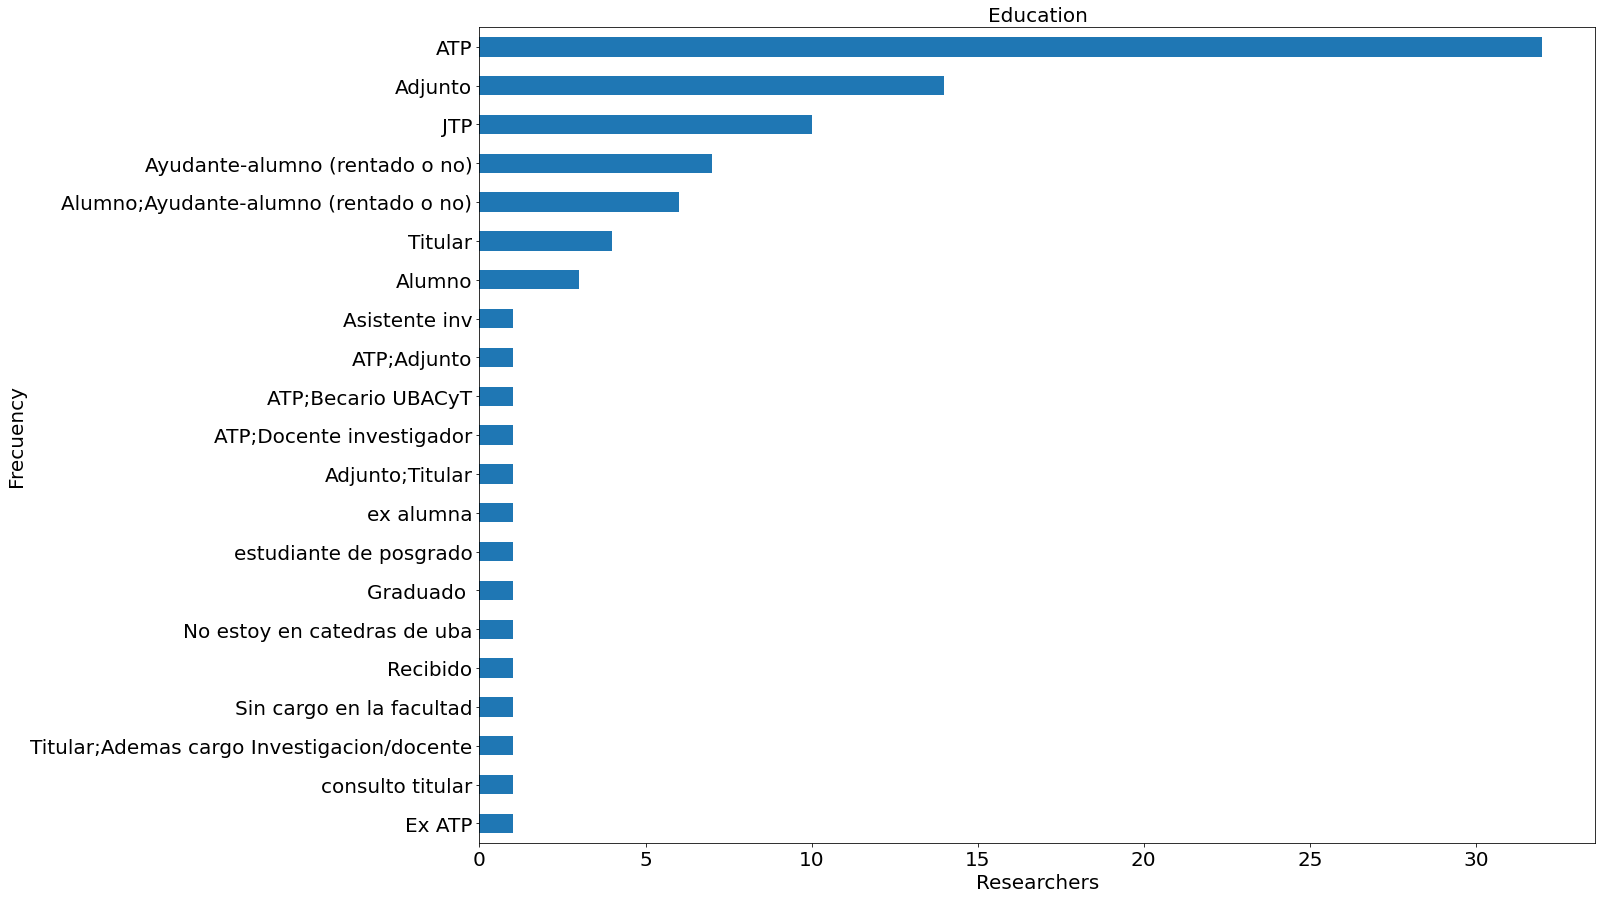

In [14]:
plt.figure(figsize=(20,15))
ax = df.groupby("position").size().sort_values(ascending=True).plot.barh(fontsize=20)
ax.set_title('Education', fontsize=20)
ax.set_xlabel("Researchers", fontsize=20)
ax.set_ylabel("Frecuency", fontsize=20)

#### 2.4) Methodology

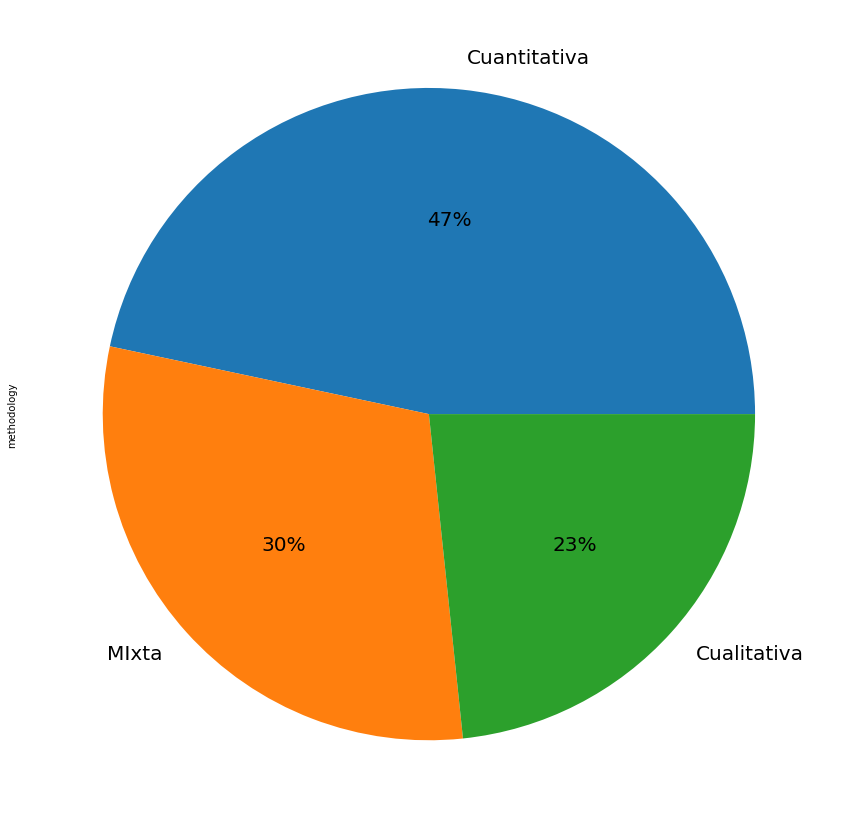

In [15]:
plt.figure(figsize=(20,15))
df["methodology"].value_counts().plot.pie(autopct='%1.0f%%', fontsize=20)

#### 2.5) Age

Text(0, 0.5, 'Frecuency')

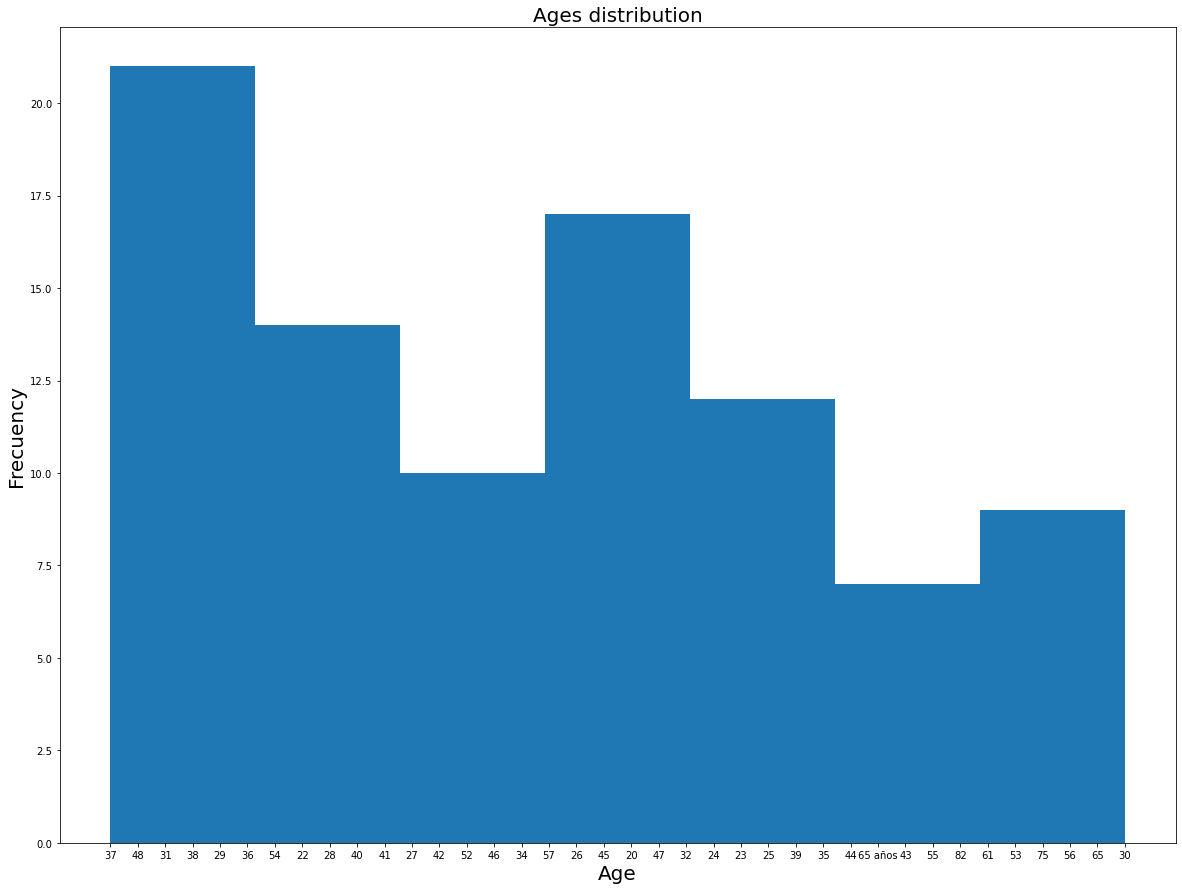

In [16]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(1,1,1)
ax.hist(df["age"], bins = 7)
plt.title('Ages distribution', fontsize = 20)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Frecuency', fontsize = 20)

### 3) Analyse the total percentage of “yes” responses to belief in crisis. Analyse as a function of career stage and methodological approach.

#### 3.1) Belief

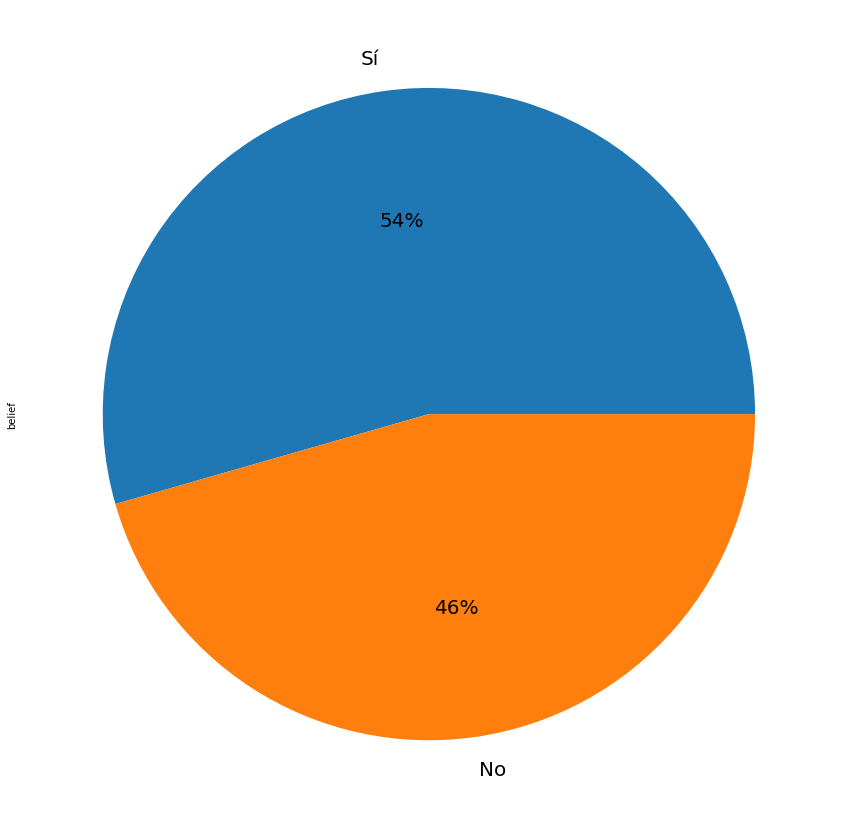

In [17]:
df["belief"].value_counts().plot.pie(figsize = (20,15), autopct = "%1.0f%%", fontsize = 20)